<a target="_blank" href="https://colab.research.google.com/github/sonder-art/automl_p24/blob/main/codigo/modelos_preentrenados/intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#! pip install requests
#!pip install tqdm

# CIFAR 10

Vamos a clasificar las imagenes de `CIFAR10`. La descripcion del [dataset](https://www.cs.toronto.edu/~kriz/cifar.html) la podemos ver aqui.

# Inferencia ResNet18

La arquitectura y modelo pre-entrenado que usaremos es [ResNet-10](https://pytorch.org/vision/main/models/resnet.html)

##     Configuración inicial y carga del modelo pre-entrenado:

In [2]:
from tqdm import tqdm

In [3]:
# Importamos las bibliotecas necesarias
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

El modelo de ResNet18 se encuentra en la libreria de torchvision

In [5]:
# Cargamos el modelo pre-entrenado ResNet18 y lo ponemos en modo de evaluación
model = models.resnet18(pretrained=True)
model = model.to(device)
model.eval()

/home/uumami/itam/automl_p24/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/uumami/itam/automl_p24/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
# Cargamos las etiquetas de ImageNet para interpretar las predicciones
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
labels = requests.get(LABELS_URL).json()

Veamos que labels o etiquetas tiene el ImageNet

In [7]:
labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

##     Pre-procesamiento de la imagen:

Tenemos que hacer que la imagenes que entren a nuestro modelo sean compatibles con el (por ejemplo en el numero de pixeles y canales). Para eso debemos transformarlas usando la funcion de `transform` de pytorch. En este caso cortamos y centramos las imagenes. [Documentacion](https://pytorch.org/hub/pytorch_vision_resnet/)

In [8]:
# Definimos una transformación para la imagen que coincide con el pre-procesamiento usado durante el entrenamiento de ResNet
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


## Imagen

Descarga una imagen de la web (usando el URL) para probar la imagen

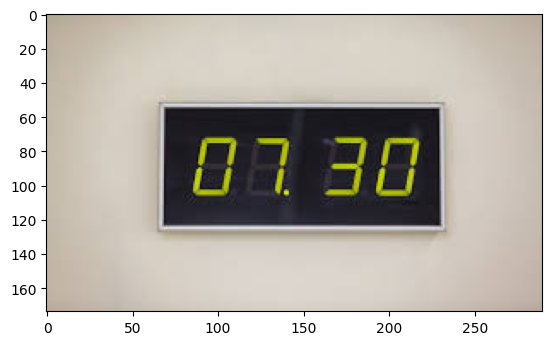

In [9]:
# Descargamos una imagen de ejemplo
img_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAfUfoN9aSGbUQjxbkh0sB4DmYx0TBoS1QIw&s'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Visualicemos la imagen
imgplot = plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


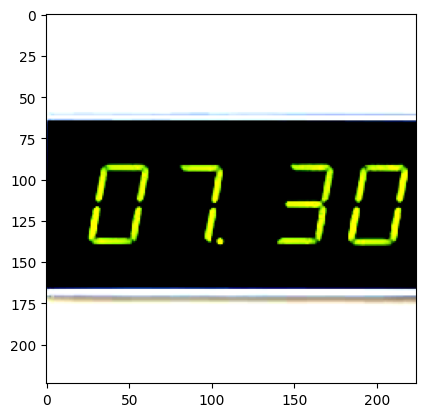

In [10]:
imgt = transform(img).unsqueeze(0)
imgplot = imgt[0].permute(1, 2, 0)  # Reorder dimensions to (H, W, C)
imgplot = plt.imshow(imgplot)
plt.show()

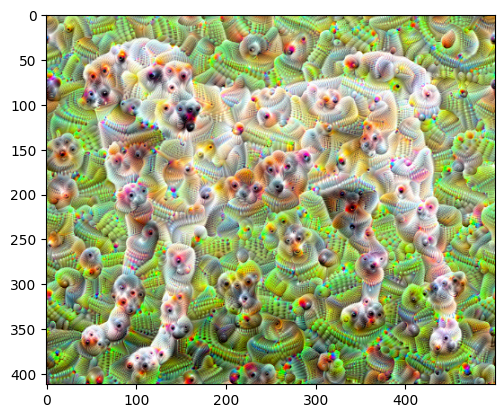

In [11]:
# Descargamos una imagen de ejemplo
img_url = 'https://www.tensorflow.org/tutorials/generative/images/dogception.png'
response = requests.get(img_url)
img_d = Image.open(BytesIO(response.content))

# Visualicemos la imagen
imgplot = plt.imshow(img_d)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


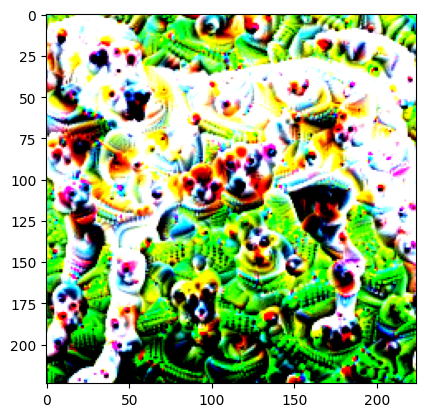

In [12]:
imgt_d = transform(img_d).unsqueeze(0)
imgplot = imgt_d[0].permute(1, 2, 0)  # Reorder dimensions to (H, W, C)
imgplot = plt.imshow(imgplot)
plt.show()

In [13]:
# Aplicamos la transformación
tensor_img = transform(img).unsqueeze(0)
# Realizamos una predicción con el modelo
model.eval()
with torch.no_grad():
    outputs = model(tensor_img.to(device))
    _, predicted = outputs.max(1)
    class_id = predicted.item()
    class_label = labels[str(class_id)][1]

print(f"Predicción: {class_label}")


Predicción: digital_clock


In [14]:
# Aplicamos la transformación
tensor_img_2 = transform(img_d).unsqueeze(0)
# Realizamos una predicción con el modelo
model.eval()
with torch.no_grad():
    outputs = model(tensor_img_2.to(device))
    _, predicted = outputs.max(1)
    class_id = predicted.item()
    class_label = labels[str(class_id)][1]

print(f"Predicción: {class_label}")


Predicción: toyshop


# Fine-Tune ResNet18 para CIFAR10

## 1. Eleccion de Modelo

Utilizaremos ResNet18 para prediccion de CIFAR10

In [28]:
import torch
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Cargmaos el modelo de ResNet18 de nuevo. Existen diferentes ResNets puedes verlas [aqui](https://pytorch.org/vision/main/models/resnet.html), aunque entre mas grande mas taradado el entrenamiento, y puede que la memoria del GPU no sea suficiente.

In [29]:
model = models.resnet18(pretrained=True)

## 2. Adaptar la Arquitectura


Modifiquemos la ultima capa para que corresponda con el CIFAR10

Que modificaciones tenemos que realizar para que se adapte a `CIFAR10`?

In [30]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # CIFAR-10 tiene 10 clases
model = model.to(device)

Creemos las transformaciones que debemos aplicar a las imagenes para que sean compatibles con Resnet18

In [31]:
# Transformaciones para los conjuntos de datos
transform = transforms.Compose([
    transforms.Resize(224),  # Cambiamos el tamaño de las imágenes de CIFAR-10 para adaptarlas a ResNet18
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

## Entrenamiento

### Carga de Datos

In [32]:
# Cargar datasets
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

Files already downloaded and verified


KeyboardInterrupt: 

### Definir funciones de entrenamiento

Definamos una funcion de entrenamiento.

In [ ]:
def train_and_evaluate(model, optimizer, criterion, num_epochs=5):
    model = model.to(device)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects_train = 0
        print(f'Running epoch {epoch}')
        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            corrects_train += torch.sum(preds == labels.data)
            

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = corrects_train.double() / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_acc)

        # Print training loss and accuracy
        print(f'Epoch {epoch+1}/{num_epochs} - Training loss: {epoch_train_loss:.4f}, Accuracy: {epoch_train_acc:.4f}')

        model.eval()
        running_loss = 0.0
        corrects_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                corrects_val += torch.sum(preds == labels.data)

        epoch_val_loss = running_loss / len(val_loader.dataset)
        epoch_val_acc = corrects_val.double() / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc)

        # Print validation loss and accuracy
        print(f'Epoch {epoch+1}/{num_epochs} - Validation loss: {epoch_val_loss:.4f}, Accuracy: {epoch_val_acc:.4f}')


    return train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
def test_model(model, criterion):
    model = model.to(device)
    model.eval()
    running_loss = 0.0
    corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            corrects += torch.sum(preds == labels.data)

    test_loss = running_loss / len(test_loader.dataset)
    accuracy = corrects.double() / len(test_loader.dataset)
    return test_loss, accuracy

Funcion de visualizacion

In [ ]:
# Función para graficar
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, test_loss, test_accuracy, title):
    train_accuracies = [c.item() for c in train_accuracies]
    val_accuracies = [c.item() for c in val_accuracies]
    test_accuracy = test_accuracy.item()


    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r^-', label='Validation Loss')
    plt.axhline(y=test_loss, color='g', linestyle='--', label='Test Loss')
    plt.title(title + ' - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'r^-', label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='g', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
    plt.title(title + ' - Accuracy')
    plt.legend()

    plt.show()

### Estrategia Entrenando todas las Capas

In [ ]:
def full_resnet_training(lr=.001):
    model = models.resnet18()
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 10)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    return model, optimizer

In [ ]:
# Funcion de perdida
criterion = nn.CrossEntropyLoss()
# Init modelo
model1, optimizer1 = full_resnet_training()
model1

In [ ]:
# Perdida
test_loss_in, test_accuracy_in = test_model(model1, criterion)
print(f'Test accuracy {test_accuracy_in}    Test loss {test_loss_in}')

In [ ]:
train_losses1, val_losses1, train_accuracies1, val_accuracies1 = train_and_evaluate(model1,
                                                optimizer1, criterion, num_epochs=3)
test_loss1, test_accuracy1 = test_model(model1, criterion)

In [ ]:
# Perdida
test_loss_fin, test_accuracy_fin = test_model(model1, criterion)
print(f'Test accuracy {test_accuracy_fin}    Test loss {test_loss_fin}')

tensor(0.5805, device='cuda:0', dtype=torch.float64)

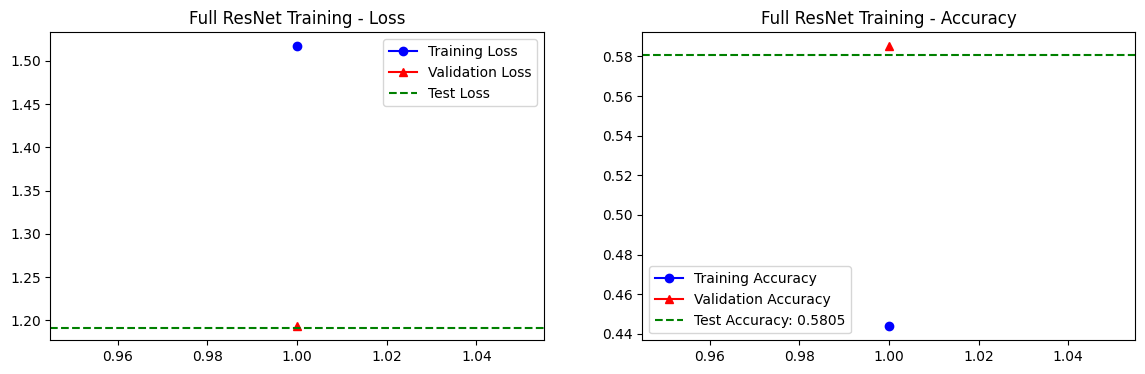

In [ ]:
plot_metrics(train_losses1, val_losses1, train_accuracies1, val_accuracies1, test_loss1, test_accuracy1, "Full ResNet Training")

### Estrategia de congelar todas las capas y agregar una pequena red al final

In [ ]:
def freeze_resnet_add_head(lr=.001):
    model = models.resnet18()
    for param in model.parameters():
        param.requires_grad = False

    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(num_ftrs, 512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 10)
    )
    optimizer = optim.Adam(model.fc.parameters(), lr=lr)
    return model, optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
model2, optimizer2 = freeze_resnet_add_head()
model2

In [ ]:
train_losses2, val_losses2, train_accuracies2, val_accuracies2 = train_and_evaluate(model2, optimizer2, criterion,
                                                                                    num_epochs=3)
test_loss2, test_accuracy2 = test_model(model2, criterion)

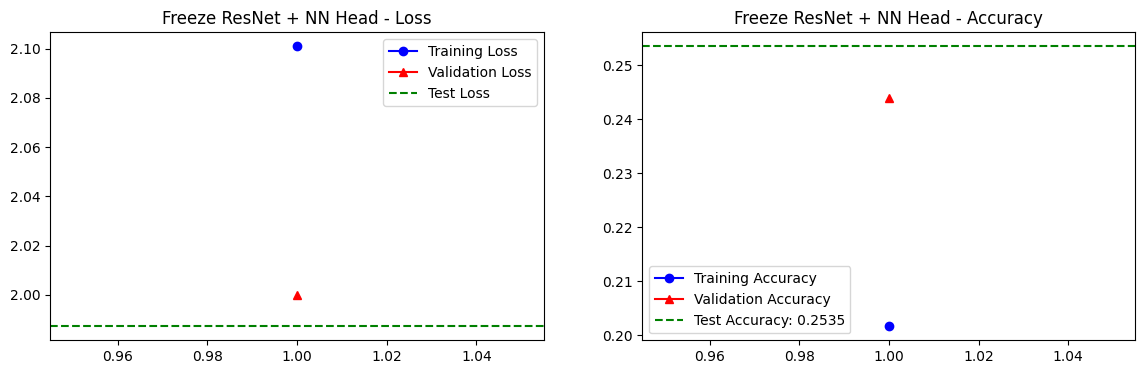

In [ ]:
plot_metrics(train_losses2, val_losses2, train_accuracies2, val_accuracies2, test_loss2, test_accuracy2, "Freeze ResNet + NN Head")


### Estrategia de congelar capas iniciales, dejar libres las finales y agregar una pequena red al final

In [ ]:

def freeze_early_layers_add_head(lr=0.001):
    model = models.resnet18(pretrained=True)  # Asumiendo que quieres un modelo preentrenado

    # Congelar las primeras capas: todo excepto el último bloque
    for name, param in model.named_parameters():
        if 'layer4' not in name:
            param.requires_grad = False

    # Nueva "cabeza" para el modelo
    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(num_ftrs, 512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 10)  # 10 clases, por ejemplo
    )

    # Usamos el optimizador sólo para los parámetros que requieren gradiente (la "cabeza" y el último bloque)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)

    return model, optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
model3, optimizer3 = freeze_early_layers_add_head()

In [ ]:
model3

In [ ]:
train_losses3, val_losses3, train_accuracies3, val_accuracies3 = train_and_evaluate(model3, optimizer3, criterion,
                                                                                    num_epochs=3)
test_loss3, test_accuracy3 = test_model(model3, criterion)

In [ ]:
plot_metrics(train_losses3, val_losses3, 
             train_accuracies3, val_accuracies3, 
             test_loss3, test_accuracy3, "Freeze Early-Layers + Last-Layers Free + NN Head")
